In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [40]:
iris = datasets.load_iris()


In [41]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(dict(zip(range(3), iris.target_names)))


C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ajay singh\AppData\Local\Temp\ipykernel_12488\1596669651.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Call tight_layout without arguments


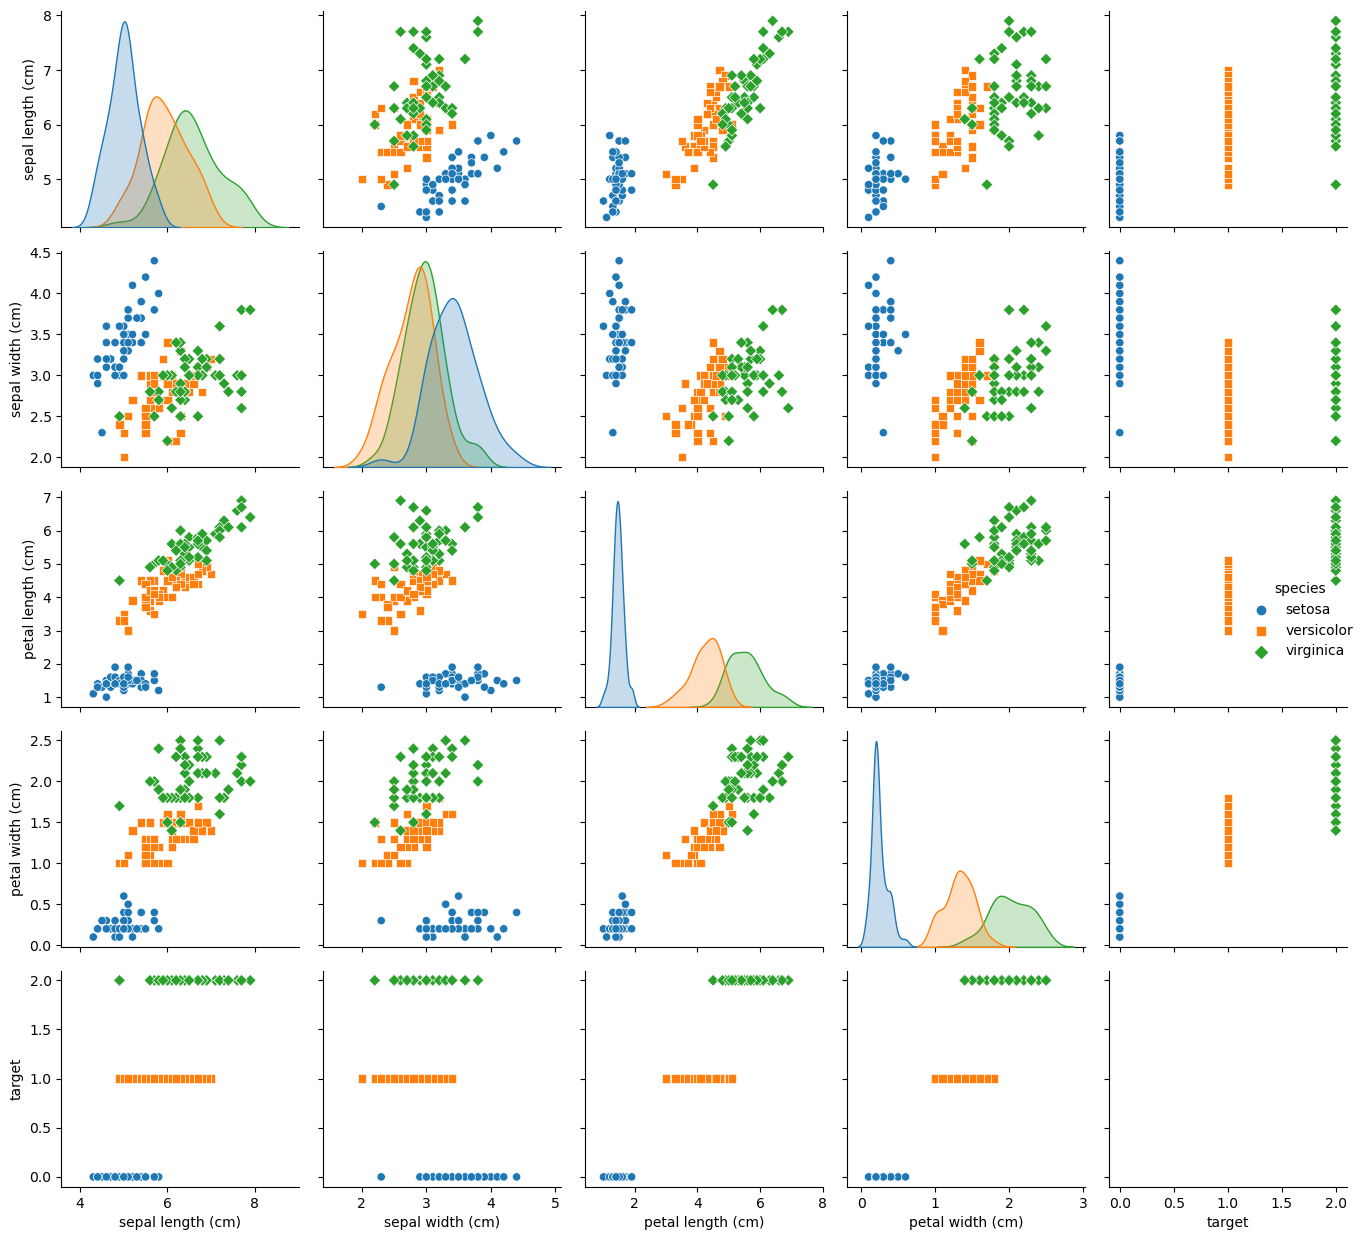

In [42]:
# Plotting pairplot
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.tight_layout()  # Call tight_layout without arguments
plt.show()


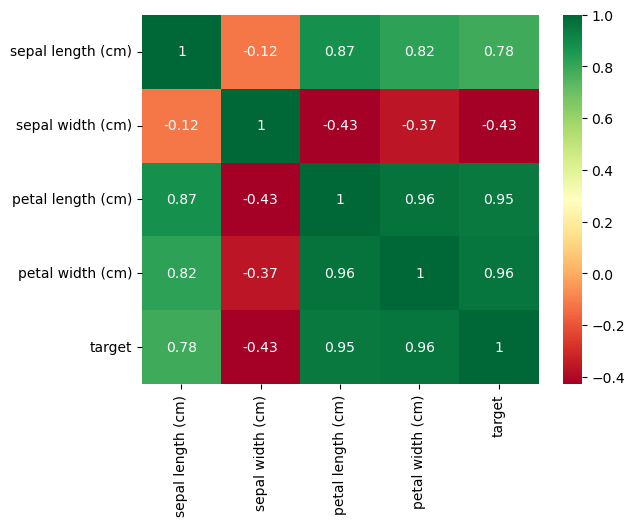

In [43]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Generate the heatmap for the correlation matrix of numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn')
plt.show()



In [44]:
X = df.drop(['target', 'species'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
def euclidean_distance(x1, x2):
    # calculate the Euclidean distance between two points
    return np.sqrt(np.sum((x1 - x2) ** 2))

def get_neighbors(X_train, y_train, x_test, k):
    # find the k nearest neighbors of a given point
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    return neighbors

def predict(X_train, y_train, x_test, k):
    # predict the class of a given point based on the majority vote of its neighbors
    neighbors = get_neighbors(X_train, y_train, x_test, k)
    classes = [n[1] for n in neighbors]
    prediction = max(classes, key=classes.count)
    return prediction


In [46]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=20)

In [47]:
y_pred_scratch = [predict(X_train.to_numpy(), y_train.to_numpy(), x, k) for x in X_test.to_numpy()]
y_pred_sklearn = knn.predict(X_test)
acc_scratch = accuracy_score(y_test, y_pred_scratch)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Accuracy of k-NN from scratch: {acc_scratch}')
print(f'Accuracy of k-NN from sklearn: {acc_sklearn}')


Accuracy of k-NN from scratch: 1.0
Accuracy of k-NN from sklearn: 1.0


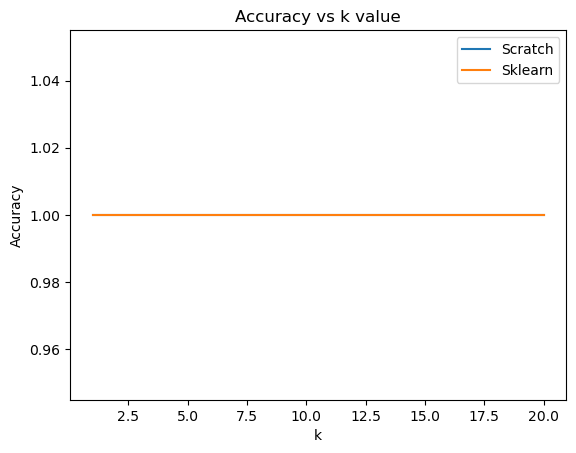

In [48]:
k_values = range(1, 21)
acc_scratch_list = []
acc_sklearn_list = []
for k in k_values:
    y_pred_scratch = [predict(X_train.to_numpy(), y_train.to_numpy(), x, k) for x in X_test.to_numpy()]
    y_pred_sklearn = knn.predict(X_test)
    acc_scratch = accuracy_score(y_test, y_pred_scratch)
    acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
    acc_scratch_list.append(acc_scratch)
    acc_sklearn_list.append(acc_sklearn)

plt.plot(k_values, acc_scratch_list, label='Scratch')
plt.plot(k_values, acc_sklearn_list, label='Sklearn')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value')
plt.legend()
plt.show()


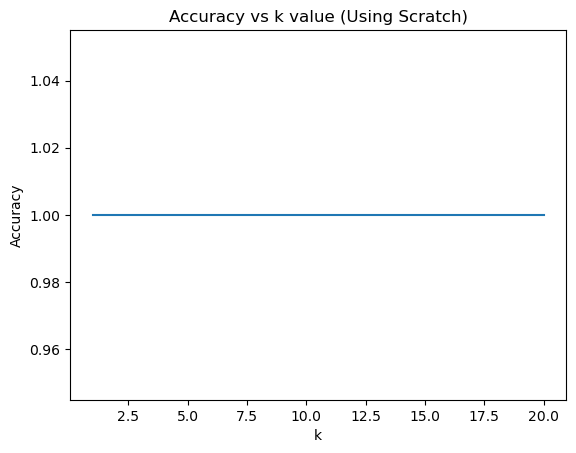

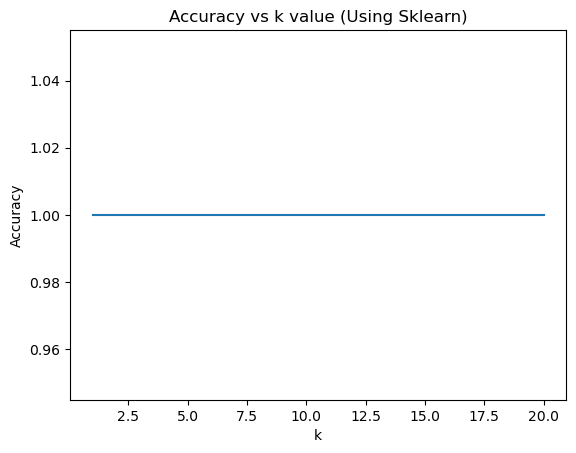

In [49]:
#this is for seperate graph
k_values = range(1, 21)
acc_scratch_list = []
acc_sklearn_list = []

for k in k_values:
    y_pred_scratch = [predict(X_train.to_numpy(), y_train.to_numpy(), x, k) for x in X_test.to_numpy()]
    y_pred_sklearn = knn.predict(X_test)
    acc_scratch = accuracy_score(y_test, y_pred_scratch)
    acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
    acc_scratch_list.append(acc_scratch)
    acc_sklearn_list.append(acc_sklearn)

# Plotting accuracy vs k for Scratch
plt.plot(k_values, acc_scratch_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value (Using Scratch)')
plt.show()

# Plotting accuracy vs k for Sklearn
plt.plot(k_values, acc_sklearn_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value (Using Sklearn)')
plt.show()
